In [1]:
pip install polygon-api-client

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install fire

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install questionary

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install load_dotenv

Note: you may need to restart the kernel to use updated packages.


In [5]:
#from polygon import RESTClient

In [6]:
#import the necessary modules
import pandas as pd
#questionary
from pathlib import Path
import fire
import questionary
#API
import os
import json
import requests
from dotenv import load_dotenv
from MCForecastTools import MCSimulation
%matplotlib inline


In [7]:
from IPython.display import display_html 

In [8]:
POLYGON_API_KEY = 'JQfBpF3NpcYjuBdMiXeUr6q54XafY_pQ'

In [9]:
ticker_list = ["AMZN", "RTH", "AMT", "IYR", "XOM", "XLE", "SPY"]

In [10]:
import requests
import datetime
from time import sleep
from tqdm import tqdm
def get_prices(start_date,end_date,universe):
    data = pd.DataFrame()
    # end_at = datetime.datetime.now() 
    # begin_from = end_at + datetime.timedelta(days=-5000)
    for t in tqdm(universe):
        print(t)
        print(len(data))
        # for start in pd.date_range(start = begin_from, end = end_at,normalize=True,freq = '88D'):
        #     end = start + datetime.timedelta(days = 88)
        #     end = str(int((end - datetime.datetime(1970,1,1)).total_seconds()))
        #     start = str(int((start - datetime.datetime(1970,1,1)).total_seconds()))
        try:
            r = requests.get(f'https://api.polygon.io/v2/aggs/ticker/{t}/range/1/day/{start_date}/{end_date}?apiKey={POLYGON_API_KEY}')
        except json.JSONDecodeError:
            pass
        try:
            # print(r.json())
            temp_data = pd.DataFrame(r.json()['results'])
            temp_data['ticker'] = t
            data = data.append(temp_data, ignore_index=True)
            print(t+':'+str(pd.to_datetime(start_date, unit='s'))+':'+str(pd.to_datetime(end_date, unit='s')))
        except KeyError:
            print(f'{t} was not found')
            pass
        except ValueError:
            pass
        except ConnectionError as error:
            print(error)
            sleep(200)
            continue
        except TimeoutError as error:
            print(error)
            sleep(200)
            continue
        sleep(0.25)
#     data.to_csv(file_name,index = False)
    data.t = pd.to_datetime(data.t, unit = 'ms')
    columns_name = {'t': 'time', 'o': 'Open', 'c': 'Close', 'h': 'High', 'l': 'Low', 'v': 'Volume'} 
    data= data.rename(columns = columns_name)
    data = data[['time','ticker','Open', 'Close','High', 'Low', 'Volume']]
    data = data.set_index(['time', 'ticker'])
    data["daily_returns"] = data['Close'].groupby('ticker').pct_change()
    data = data.dropna()
    #data.to_csv(file_name, index = False)
    return data

In [11]:
# Create `start_date` and `end_date` variables for the period during the pandemic
start_date = "2020-03-01"
end_date = "2021-03-01"
all_data = get_prices(start_date=start_date, end_date=end_date, universe=ticker_list)


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

AMZN
0


 14%|████████████                                                                        | 1/7 [00:00<00:03,  1.72it/s]

RTH
252


 29%|████████████████████████                                                            | 2/7 [00:01<00:02,  1.83it/s]

AMT
504


 43%|████████████████████████████████████                                                | 3/7 [00:01<00:02,  1.87it/s]

IYR
756


 57%|████████████████████████████████████████████████                                    | 4/7 [00:02<00:01,  1.93it/s]

XOM
1008


 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:02<00:01,  1.97it/s]

XLE
1260


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:03<00:00,  1.96it/s]

SPY
1512


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  1.93it/s]


In [12]:
all_data.index

MultiIndex([('2020-03-03 05:00:00', 'AMZN'),
            ('2020-03-04 05:00:00', 'AMZN'),
            ('2020-03-05 05:00:00', 'AMZN'),
            ('2020-03-06 05:00:00', 'AMZN'),
            ('2020-03-09 04:00:00', 'AMZN'),
            ('2020-03-10 04:00:00', 'AMZN'),
            ('2020-03-11 04:00:00', 'AMZN'),
            ('2020-03-12 04:00:00', 'AMZN'),
            ('2020-03-13 04:00:00', 'AMZN'),
            ('2020-03-16 04:00:00', 'AMZN'),
            ...
            ('2021-02-16 05:00:00',  'SPY'),
            ('2021-02-17 05:00:00',  'SPY'),
            ('2021-02-18 05:00:00',  'SPY'),
            ('2021-02-19 05:00:00',  'SPY'),
            ('2021-02-22 05:00:00',  'SPY'),
            ('2021-02-23 05:00:00',  'SPY'),
            ('2021-02-24 05:00:00',  'SPY'),
            ('2021-02-25 05:00:00',  'SPY'),
            ('2021-02-26 05:00:00',  'SPY'),
            ('2021-03-01 05:00:00',  'SPY')],
           names=['time', 'ticker'], length=1757)

In [13]:
idx = pd.IndexSlice

In [14]:
AMZN_daily_returns_df = all_data.loc[idx[:,'AMZN'],['daily_returns']]
AMZN_daily_returns_df


daily_returns
time                ticker               
2020-03-03 05:00:00 AMZN        -0.023010
2020-03-04 05:00:00 AMZN         0.035013
2020-03-05 05:00:00 AMZN        -0.026217
2020-03-06 05:00:00 AMZN        -0.011923
2020-03-09 04:00:00 AMZN        -0.052854
...                                   ...
2021-02-23 05:00:00 AMZN         0.004326
2021-02-24 05:00:00 AMZN        -0.010947
2021-02-25 05:00:00 AMZN        -0.032400
2021-02-26 05:00:00 AMZN         0.011700
2021-03-01 05:00:00 AMZN         0.017204

[251 rows x 1 columns]

In [15]:
RTH_daily_returns_df = all_data.loc[idx[:,'RTH'],['daily_returns']]
RTH_daily_returns_df

daily_returns
time                ticker               
2020-03-03 05:00:00 RTH         -0.025206
2020-03-04 05:00:00 RTH          0.039796
2020-03-05 05:00:00 RTH         -0.022688
2020-03-06 05:00:00 RTH         -0.009098
2020-03-09 04:00:00 RTH         -0.042211
...                                   ...
2021-02-23 05:00:00 RTH         -0.007181
2021-02-24 05:00:00 RTH         -0.009183
2021-02-25 05:00:00 RTH         -0.023932
2021-02-26 05:00:00 RTH         -0.001041
2021-03-01 05:00:00 RTH          0.016992

[251 rows x 1 columns]

In [16]:
AMT_daily_returns_df = all_data.loc[idx[:,'AMT'],['daily_returns']]
AMT_daily_returns_df

daily_returns
time                ticker               
2020-03-03 05:00:00 AMT          0.007892
2020-03-04 05:00:00 AMT          0.037132
2020-03-05 05:00:00 AMT         -0.018755
2020-03-06 05:00:00 AMT         -0.002511
2020-03-09 04:00:00 AMT         -0.058704
...                                   ...
2021-02-23 05:00:00 AMT         -0.008442
2021-02-24 05:00:00 AMT          0.007214
2021-02-25 05:00:00 AMT         -0.000133
2021-02-26 05:00:00 AMT         -0.038354
2021-03-01 05:00:00 AMT         -0.010919

[251 rows x 1 columns]

In [17]:
IYR_daily_returns_df = all_data.loc[idx[:,'IYR'],['daily_returns']]
IYR_daily_returns_df

daily_returns
time                ticker               
2020-03-03 05:00:00 IYR          0.000109
2020-03-04 05:00:00 IYR          0.038201
2020-03-05 05:00:00 IYR         -0.021762
2020-03-06 05:00:00 IYR         -0.016980
2020-03-09 04:00:00 IYR         -0.074123
...                                   ...
2021-02-23 05:00:00 IYR          0.005603
2021-02-24 05:00:00 IYR          0.005349
2021-02-25 05:00:00 IYR         -0.016848
2021-02-26 05:00:00 IYR         -0.015220
2021-03-01 05:00:00 IYR          0.002519

[251 rows x 1 columns]

In [18]:
XOM_daily_returns_df = all_data.loc[idx[:,'XOM'],['daily_returns']]
XOM_daily_returns_df

daily_returns
time                ticker               
2020-03-03 05:00:00 XOM         -0.047884
2020-03-04 05:00:00 XOM          0.021832
2020-03-05 05:00:00 XOM         -0.044067
2020-03-06 05:00:00 XOM         -0.048294
2020-03-09 04:00:00 XOM         -0.122248
...                                   ...
2021-02-23 05:00:00 XOM          0.013812
2021-02-24 05:00:00 XOM          0.029973
2021-02-25 05:00:00 XOM         -0.016578
2021-02-26 05:00:00 XOM         -0.024928
2021-03-01 05:00:00 XOM          0.037337

[251 rows x 1 columns]

In [19]:
XLE_daily_returns_df = all_data.loc[idx[:,'XLE'],['daily_returns']]
XLE_daily_returns_df

daily_returns
time                ticker               
2020-03-03 05:00:00 XLE         -0.030573
2020-03-04 05:00:00 XLE          0.023653
2020-03-05 05:00:00 XLE         -0.036585
2020-03-06 05:00:00 XLE         -0.056185
2020-03-09 04:00:00 XLE         -0.201412
...                                   ...
2021-02-23 05:00:00 XLE          0.016534
2021-02-24 05:00:00 XLE          0.035413
2021-02-25 05:00:00 XLE         -0.019288
2021-02-26 05:00:00 XLE         -0.023723
2021-03-01 05:00:00 XLE          0.025961

[251 rows x 1 columns]

In [20]:
SPY_daily_returns_df = all_data.loc[idx[:,'SPY'],['daily_returns']]
SPY_daily_returns_df

daily_returns
time                ticker               
2020-03-03 05:00:00 SPY         -0.028632
2020-03-04 05:00:00 SPY          0.042033
2020-03-05 05:00:00 SPY         -0.033242
2020-03-06 05:00:00 SPY         -0.016531
2020-03-09 04:00:00 SPY         -0.078095
...                                   ...
2021-02-23 05:00:00 SPY          0.001214
2021-02-24 05:00:00 SPY          0.011019
2021-02-25 05:00:00 SPY         -0.024096
2021-02-26 05:00:00 SPY         -0.005153
2021-03-01 05:00:00 SPY          0.024240

[251 rows x 1 columns]

In [21]:
tech_daily_returns = pd.concat([AMZN_daily_returns_df, RTH_daily_returns_df], keys=["AMZN","RTH"])
tech_daily_returns

daily_returns
     time                ticker               
AMZN 2020-03-03 05:00:00 AMZN        -0.023010
     2020-03-04 05:00:00 AMZN         0.035013
     2020-03-05 05:00:00 AMZN        -0.026217
     2020-03-06 05:00:00 AMZN        -0.011923
     2020-03-09 04:00:00 AMZN        -0.052854
...                                        ...
RTH  2021-02-23 05:00:00 RTH         -0.007181
     2021-02-24 05:00:00 RTH         -0.009183
     2021-02-25 05:00:00 RTH         -0.023932
     2021-02-26 05:00:00 RTH         -0.001041
     2021-03-01 05:00:00 RTH          0.016992

[502 rows x 1 columns]

In [22]:
RE_daily_returns = pd.concat([AMT_daily_returns_df, IYR_daily_returns_df], keys=["AMT","IYR"])
RE_daily_returns

daily_returns
    time                ticker               
AMT 2020-03-03 05:00:00 AMT          0.007892
    2020-03-04 05:00:00 AMT          0.037132
    2020-03-05 05:00:00 AMT         -0.018755
    2020-03-06 05:00:00 AMT         -0.002511
    2020-03-09 04:00:00 AMT         -0.058704
...                                       ...
IYR 2021-02-23 05:00:00 IYR          0.005603
    2021-02-24 05:00:00 IYR          0.005349
    2021-02-25 05:00:00 IYR         -0.016848
    2021-02-26 05:00:00 IYR         -0.015220
    2021-03-01 05:00:00 IYR          0.002519

[502 rows x 1 columns]

In [23]:
energy_daily_returns = pd.concat([XOM_daily_returns_df, XLE_daily_returns_df], keys=["XOM","XLE"])
energy_daily_returns

daily_returns
    time                ticker               
XOM 2020-03-03 05:00:00 XOM         -0.047884
    2020-03-04 05:00:00 XOM          0.021832
    2020-03-05 05:00:00 XOM         -0.044067
    2020-03-06 05:00:00 XOM         -0.048294
    2020-03-09 04:00:00 XOM         -0.122248
...                                       ...
XLE 2021-02-23 05:00:00 XLE          0.016534
    2021-02-24 05:00:00 XLE          0.035413
    2021-02-25 05:00:00 XLE         -0.019288
    2021-02-26 05:00:00 XLE         -0.023723
    2021-03-01 05:00:00 XLE          0.025961

[502 rows x 1 columns]

In [24]:
#Display all sectors of the stock/ETF dataframes
dfT_style = tech_daily_returns.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Tech")
dfR_style = RE_daily_returns.style.set_table_attributes("style='display:inline'").set_caption("Real Estate")
dfE_style = energy_daily_returns.style.set_table_attributes("style='display:inline'").set_caption("Energy")


display_html(dfT_style._repr_html_() + dfR_style._repr_html_() + dfE_style._repr_html_(), raw=True)

Tech 
 
 
   
   
   
 daily_returns 
 
 
   
 time 
 ticker 
   
 
 
 
 
 AMZN 
 2020-03-03 05:00:00 
 AMZN 
 -0.023010 
 
 
 2020-03-04 05:00:00 
 AMZN 
 0.035013 
 
 
 2020-03-05 05:00:00 
 AMZN 
 -0.026217 
 
 
 2020-03-06 05:00:00 
 AMZN 
 -0.011923 
 
 
 2020-03-09 04:00:00 
 AMZN 
 -0.052854 
 
 
 2020-03-10 04:00:00 
 AMZN 
 0.050655 
 
 
 2020-03-11 04:00:00 
 AMZN 
 -0.037509 
 
 
 2020-03-12 04:00:00 
 AMZN 
 -0.079221 
 
 
 2020-03-13 04:00:00 
 AMZN 
 0.064648 
 
 
 2020-03-16 04:00:00 
 AMZN 
 -0.053697 
 
 
 2020-03-17 04:00:00 
 AMZN 
 0.070266 
 
 
 2020-03-18 04:00:00 
 AMZN 
 0.012258 
 
 
 2020-03-19 04:00:00 
 AMZN 
 0.027831 
 
 
 2020-03-20 04:00:00 
 AMZN 
 -0.018523 
 
 
 2020-03-23 04:00:00 
 AMZN 
 0.030735 
 
 
 2020-03-24 04:00:00 
 AMZN 
 0.019587 
 
 
 2020-03-25 04:00:00 
 AMZN 
 -0.027968 
 
 
 2020-03-26 04:00:00 
 AMZN 
 0.036933 
 
 
 2020-03-27 04:00:00 
 AMZN 
 -0.028325 
 
 
 2020-03-30 04:00:00 
 AMZN 
 0.033603 
 
 
 2020-03-31 04:00:00 
 AMZN 
 -0.007246 
 
 
 2020-04-01 04:00:00 
 AMZN 
 -0.021552 
 
 
 2020-04-02 04:00:00 
 AMZN 
 0.005834 
 
 
 2020-04-03 04:00:00 
 AMZN 
 -0.006379 
 
 
 2020-04-06 04:00:00 
 AMZN 
 0.047729 
 
 
 2020-04-07 04:00:00 
 AMZN 
 0.007013 
 
 
 2020-04-08 04:00:00 
 AMZN 
 0.015609 
 
 
 2020-04-09 04:00:00 
 AMZN 
 -0.000117 
 
 
 2020-04-13 04:00:00 
 AMZN 
 0.061735 
 
 
 2020-04-14 04:00:00 
 AMZN 
 0.052769 
 
 
 2020-04-15 04:00:00 
 AMZN 
 0.010669 
 
 
 2020-04-16 04:00:00 
 AMZN 
 0.043555 
 
 
 2020-04-17 04:00:00 
 AMZN 
 -0.013782 
 
 
 2020-04-20 04:00:00 
 AMZN 
 0.007836 
 
 
 2020-04-21 04:00:00 
 AMZN 
 -0.027360 
 
 
 2020-04-22 04:00:00 
 AMZN 
 0.015193 
 
 
 2020-04-23 04:00:00 
 AMZN 
 0.015215 
 
 
 2020-04-24 04:00:00 
 AMZN 
 0.004489 
 
 
 2020-04-27 04:00:00 
 AMZN 
 -0.014198 
 
 
 2020-04-28 04:00:00 
 AMZN 
 -0.026061 
 
 
 2020-04-29 04:00:00 
 AMZN 
 0.025336 
 
 
 2020-04-30 04:00:00 
 AMZN 
 0.042690 
 
 
 2020-05-01 04:00:00 
 AMZN 
 -0.075974 
 
 
 2020-05-04 04:00:00 
 AMZN 
 0.013101 
 
 
 2020-05-05 04:00:00 
 AMZN 
 0.000782 
 
 
 2020-05-06 04:00:00 
 AMZN 
 0.014436 
 
 
 2020-05-07 04:00:00 
 AMZN 
 0.006954 
 
 
 2020-05-08 04:00:00 
 AMZN 
 0.005068 
 
 
 2020-05-11 04:00:00 
 AMZN 
 0.012351 
 
 
 2020-05-12 04:00:00 
 AMZN 
 -0.021606 
 
 
 2020-05-13 04:00:00 
 AMZN 
 0.004654 
 
 
 2020-05-14 04:00:00 
 AMZN 
 0.008839 
 
 
 2020-05-15 04:00:00 
 AMZN 
 0.008762 
 
 
 2020-05-18 04:00:00 
 AMZN 
 0.006839 
 
 
 2020-05-19 04:00:00 
 AMZN 
 0.009508 
 
 
 2020-05-20 04:00:00 
 AMZN 
 0.019846 
 
 
 2020-05-21 04:00:00 
 AMZN 
 -0.020497 
 
 
 2020-05-22 04:00:00 
 AMZN 
 -0.004030 
 
 
 2020-05-26 04:00:00 
 AMZN 
 -0.006164 
 
 
 2020-05-27 04:00:00 
 AMZN 
 -0.004736 
 
 
 2020-05-28 04:00:00 
 AMZN 
 -0.003854 
 
 
 2020-05-29 04:00:00 
 AMZN 
 0.017188 
 
 
 2020-06-01 04:00:00 
 AMZN 
 0.011739 
 
 
 2020-06-02 04:00:00 
 AMZN 
 0.000554 
 
 
 2020-06-03 04:00:00 
 AMZN 
 0.002423 
 
 
 2020-06-04 04:00:00 
 AMZN 
 -0.007182 
 
 
 2020-06-05 04:00:00 
 AMZN 
 0.009103 
 
 
 2020-06-08 04:00:00 
 AMZN 
 0.016536 
 
 
 2020-06-09 04:00:00 
 AMZN 
 0.030427 
 
 
 2020-06-10 04:00:00 
 AMZN 
 0.017913 
 
 
 2020-06-11 04:00:00 
 AMZN 
 -0.033802 
 
 
 2020-06-12 04:00:00 
 AMZN 
 -0.005059 
 
 
 2020-06-15 04:00:00 
 AMZN 
 0.010868 
 
 
 2020-06-16 04:00:00 
 AMZN 
 0.016555 
 
 
 2020-06-17 04:00:00 
 AMZN 
 0.009831 
 
 
 2020-06-18 04:00:00 
 AMZN 
 0.004922 
 
 
 2020-06-19 04:00:00 
 AMZN 
 0.007924 
 
 
 2020-06-22 04:00:00 
 AMZN 
 0.014508 
 
 
 2020-06-23 04:00:00 
 AMZN 
 0.018642 
 
 
 2020-06-24 04:00:00 
 AMZN 
 -0.010856 
 
 
 2020-06-25 04:00:00 
 AMZN 
 0.007380 
 
 
 2020-06-26 04:00:00 
 AMZN 
 -0.022403 
 
 
 2020-06-29 04:00:00 
 AMZN 
 -0.004638 
 
 
 2020-06-30 04:00:00 
 AMZN 
 0.029265 
 
 
 2020-07-01 04:00:00 
 AMZN 
 0.043453 
 
 
 2020-07-02 04:00:00 
 AMZN 
 0.004030 
 
 
 2020-07-06 04:00:00 
 AMZN 
 0.057690 
 
 
 2020-07-07 04:00:00 
 AMZN 
 -0.018619 
 
 
 2020-07-08 04:

### Analyzing Each Stock and ETF Individually¶

In [25]:
#Questionary SQL
#How much weight do you want in each stock?


In [26]:
import warnings
warnings.filterwarnings("ignore")

In [27]:
from pytz import timezone
from IPython.display import clear_output
from time import sleep
import numpy as np
import pyfolio as pf

In [28]:
Pandemic_prices_df = pd.concat([AMZN_daily_returns_df, RTH_daily_returns_df, AMT_daily_returns_df, IYR_daily_returns_df, XOM_daily_returns_df, XLE_daily_returns_df, SPY_daily_returns_df],axis=1, keys=["AMZN","RTH","AMT","IYR","XOM","XLE","SPY"])
display(Pandemic_prices_df.std())
display(Pandemic_prices_df.mean())

AMZN  daily_returns    0.023953
RTH   daily_returns    0.018022
AMT   daily_returns    0.027542
IYR   daily_returns    0.025507
XOM   daily_returns    0.033851
XLE   daily_returns    0.038795
SPY   daily_returns    0.020825
dtype: float64

AMZN  daily_returns    0.002185
RTH   daily_returns    0.001265
AMT   daily_returns   -0.000096
IYR   daily_returns    0.000153
XOM   daily_returns    0.000753
XLE   daily_returns    0.000952
SPY   daily_returns    0.001141
dtype: float64

In [29]:
#Summary statistics for AMZN stock using .std() and .mean()
display(AMZN_daily_returns_df.std())
display(AMZN_daily_returns_df.mean())


daily_returns    0.023953
dtype: float64

daily_returns    0.002185
dtype: float64

In [30]:
#Summary statistics for RTH stock using .std() and .mean()
display(RTH_daily_returns_df.std())
display(RTH_daily_returns_df.mean())

daily_returns    0.018022
dtype: float64

daily_returns    0.001265
dtype: float64

In [31]:
#Summary statistics for AMT stock using .std() and .mean()
display(AMT_daily_returns_df.std())
display(AMT_daily_returns_df.mean())


daily_returns    0.027542
dtype: float64

daily_returns   -0.000096
dtype: float64

In [32]:
#Summary statistics for IYR stock using .std() and .mean()
display(IYR_daily_returns_df.std())
display(IYR_daily_returns_df.mean())


daily_returns    0.025507
dtype: float64

daily_returns    0.000153
dtype: float64

In [33]:
#Summary statistics for XOM stock using .std() and .mean()
display(XOM_daily_returns_df.std())
display(XOM_daily_returns_df.mean())


daily_returns    0.033851
dtype: float64

daily_returns    0.000753
dtype: float64

In [34]:
#Summary statistics for XLE stock using .std() and .mean()
display(XLE_daily_returns_df.std())
display(XLE_daily_returns_df.mean())

daily_returns    0.038795
dtype: float64

daily_returns    0.000952
dtype: float64

In [35]:
#Summary statistics for AMZN using .describe()
AMZN_daily_returns_df.describe()

daily_returns
count     251.000000
mean        0.002185
std         0.023953
min        -0.079221
25%        -0.010869
50%         0.002423
75%         0.014437
max         0.079295

In [36]:
RTH_daily_returns_df.describe()

daily_returns
count     251.000000
mean        0.001265
std         0.018022
min        -0.103722
25%        -0.005789
50%         0.002157
75%         0.008957
max         0.072946

In [37]:
#Summary statistics for AMT using .describe()
AMT_daily_returns_df.describe()

daily_returns
count     251.000000
mean       -0.000096
std         0.027542
min        -0.151638
25%        -0.013960
50%        -0.000133
75%         0.010603
max         0.122219

In [38]:
#Summary statistics for IYR using .describe()
IYR_daily_returns_df.describe()

daily_returns
count     251.000000
mean        0.000153
std         0.025507
min        -0.168700
25%        -0.010284
50%         0.001284
75%         0.010493
max         0.085328

In [39]:
#Summary statistics for XOM using .describe()
XOM_daily_returns_df.describe()

daily_returns
count     251.000000
mean        0.000753
std         0.033851
min        -0.122248
25%        -0.018573
50%        -0.001806
75%         0.019382
max         0.126868

In [40]:
#Summary statistics for XLE using .describe()
XLE_daily_returns_df.describe()

daily_returns
count     251.000000
mean        0.000952
std         0.038795
min        -0.201412
25%        -0.017289
50%         0.000000
75%         0.021461
max         0.160373

In [41]:
SPY_daily_returns_df.describe()

daily_returns
count     251.000000
mean        0.001141
std         0.020825
min        -0.109424
25%        -0.006313
50%         0.002666
75%         0.010197
max         0.090603

In [42]:
# Variance For Each Stock and ETF
Pandemic_prices_df.var()

AMZN  daily_returns    0.000574
RTH   daily_returns    0.000325
AMT   daily_returns    0.000759
IYR   daily_returns    0.000651
XOM   daily_returns    0.001146
XLE   daily_returns    0.001505
SPY   daily_returns    0.000434
dtype: float64

In [43]:
# Variance Of Amzn
AMZN_var=AMZN_daily_returns_df.var()
AMZN_var

daily_returns    0.000574
dtype: float64

In [44]:
# Variance For RTH
RTH_var=RTH_daily_returns_df.var()
RTH_var

daily_returns    0.000325
dtype: float64

In [45]:
# Variance Of IYR
IYR_var=IYR_daily_returns_df.var()
IYR_var

daily_returns    0.000651
dtype: float64

In [46]:
# Variance Of AMT
AMT_var=AMT_daily_returns_df.var()
AMT_var

daily_returns    0.000759
dtype: float64

In [47]:
# Variance Of XOM
XOM_var=XOM_daily_returns_df.var()
XOM_var

daily_returns    0.001146
dtype: float64

In [48]:
# Variance Of XLE
XLE_var=XLE_daily_returns_df.var()
XLE_var

daily_returns    0.001505
dtype: float64

In [49]:
SPY_var = SPY_daily_returns_df.var()
SPY_var

daily_returns    0.000434
dtype: float64

In [50]:
# Covariance for Each Stock and ETF
Pandemic_prices_df.cov()

AMZN           RTH           AMT           IYR  \
                   daily_returns daily_returns daily_returns daily_returns   
AMZN daily_returns      0.000574           NaN           NaN           NaN   
RTH  daily_returns           NaN      0.000325           NaN           NaN   
AMT  daily_returns           NaN           NaN      0.000759           NaN   
IYR  daily_returns           NaN           NaN           NaN      0.000651   
XOM  daily_returns           NaN           NaN           NaN           NaN   
XLE  daily_returns           NaN           NaN           NaN           NaN   
SPY  daily_returns           NaN           NaN           NaN           NaN   

                             XOM           XLE           SPY  
                   daily_returns daily_returns daily_returns  
AMZN daily_returns           NaN           NaN           NaN  
RTH  daily_returns           NaN           NaN           NaN  
AMT  daily_returns           NaN           NaN           NaN  
IYR  daily_returns           NaN           NaN           NaN  
XOM  daily_returns      0.001146           NaN           NaN  
XLE  daily_returns           NaN      0.001505           NaN  
SPY  daily_returns           NaN           NaN      0.000434

In [52]:
# Annualized returns of AMZN
AMZN_Annual_Ret = AMZN_daily_returns_df.mean()*252
AMZN_Annual_Ret

daily_returns    0.550504
dtype: float64

In [53]:
# Annualized returns of RTH
RTH_Annual_Ret = RTH_daily_returns_df.mean()*252
RTH_Annual_Ret

daily_returns    0.318854
dtype: float64

In [54]:
# Annualized returns of AMT
AMT_Annual_Ret = AMT_daily_returns_df.mean()*252
AMT_Annual_Ret

daily_returns   -0.024069
dtype: float64

In [55]:
# Annualized returns of IYR
IYR_Annual_Ret = IYR_daily_returns_df.mean()*252
IYR_Annual_Ret

daily_returns    0.038451
dtype: float64

In [56]:
# Annualized returns of XLE
XLE_Annual_Ret = XLE_daily_returns_df.mean()*252
XLE_Annual_Ret

daily_returns    0.239797
dtype: float64

In [57]:
# Annualized returns of XOM
XOM_Annual_Ret = XOM_daily_returns_df.mean()*252
XOM_Annual_Ret

daily_returns    0.18963
dtype: float64

In [58]:
SPY_Annual_Ret = SPY_daily_returns_df.mean()*252
SPY_Annual_Ret

daily_returns    0.287438
dtype: float64

In [59]:
year_trading_days = 252


In [60]:
# Annualized std dev of AMZN
annual_std_dev_AMZN = AMZN_daily_returns_df.std() * np.sqrt(year_trading_days)
annual_std_dev_AMZN

daily_returns    0.380243
dtype: float64

In [61]:
# Annualized std dev of RTH
annual_std_dev_RTH = RTH_daily_returns_df.std() * np.sqrt(year_trading_days)
annual_std_dev_RTH

daily_returns    0.286085
dtype: float64

In [62]:
# Annualized std dev of AMT
annual_std_dev_AMT = AMT_daily_returns_df.std() * np.sqrt(year_trading_days)
annual_std_dev_AMT

daily_returns    0.437213
dtype: float64

In [63]:
# Annualized std dev of IYR
annual_std_dev_IYR = IYR_daily_returns_df.std() * np.sqrt(year_trading_days)
annual_std_dev_IYR

daily_returns    0.404905
dtype: float64

In [64]:
# Annualized std dev of XLE
annual_std_dev_XLE = XLE_daily_returns_df.std() * np.sqrt(year_trading_days)
annual_std_dev_XLE

daily_returns    0.615857
dtype: float64

In [65]:
# Annualized std dev of XOM
annual_std_dev_XOM= XOM_daily_returns_df.std() * np.sqrt(year_trading_days)
annual_std_dev_XOM

daily_returns    0.537374
dtype: float64

In [66]:
# Annualized std dev of SPY
annual_std_dev_SPY = SPY_daily_returns_df.std() * np.sqrt(year_trading_days)
annual_std_dev_SPY

daily_returns    0.330585
dtype: float64

In [67]:
#Sharpe ratio for each stock and ETF 
Sharpe_AMZN = AMZN_Annual_Ret/annual_std_dev_AMZN
Sharpe_AMZN

daily_returns    1.44777
dtype: float64

In [68]:
#Sharpe ratio for each stock and ETF 
Sharpe_RTH = RTH_Annual_Ret/annual_std_dev_RTH
Sharpe_RTH

daily_returns    1.114541
dtype: float64

In [69]:
#Sharpe ratio for each stock and ETF 
Sharpe_IYR = IYR_Annual_Ret/annual_std_dev_IYR
Sharpe_IYR 

daily_returns    0.094964
dtype: float64

In [70]:
#Sharpe ratio for each stock and ETF 
Sharpe_XLE = XLE_Annual_Ret/annual_std_dev_XLE
Sharpe_XLE

daily_returns    0.389372
dtype: float64

In [71]:
#Sharpe ratio for each stock and ETF 
Sharpe_XOM = XOM_Annual_Ret/annual_std_dev_XOM
Sharpe_XOM

daily_returns    0.352883
dtype: float64

In [72]:
#Sharpe ratio for each stock and ETF 
Sharpe_SPY = SPY_Annual_Ret/annual_std_dev_SPY
Sharpe_SPY

daily_returns    0.869485
dtype: float64

In [73]:
AMZN_daily_returns_df.reset_index(level = 1,drop = True).daily_returns

time
2020-03-03 05:00:00   -0.023010
2020-03-04 05:00:00    0.035013
2020-03-05 05:00:00   -0.026217
2020-03-06 05:00:00   -0.011923
2020-03-09 04:00:00   -0.052854
                         ...   
2021-02-23 05:00:00    0.004326
2021-02-24 05:00:00   -0.010947
2021-02-25 05:00:00   -0.032400
2021-02-26 05:00:00    0.011700
2021-03-01 05:00:00    0.017204
Name: daily_returns, Length: 251, dtype: float64

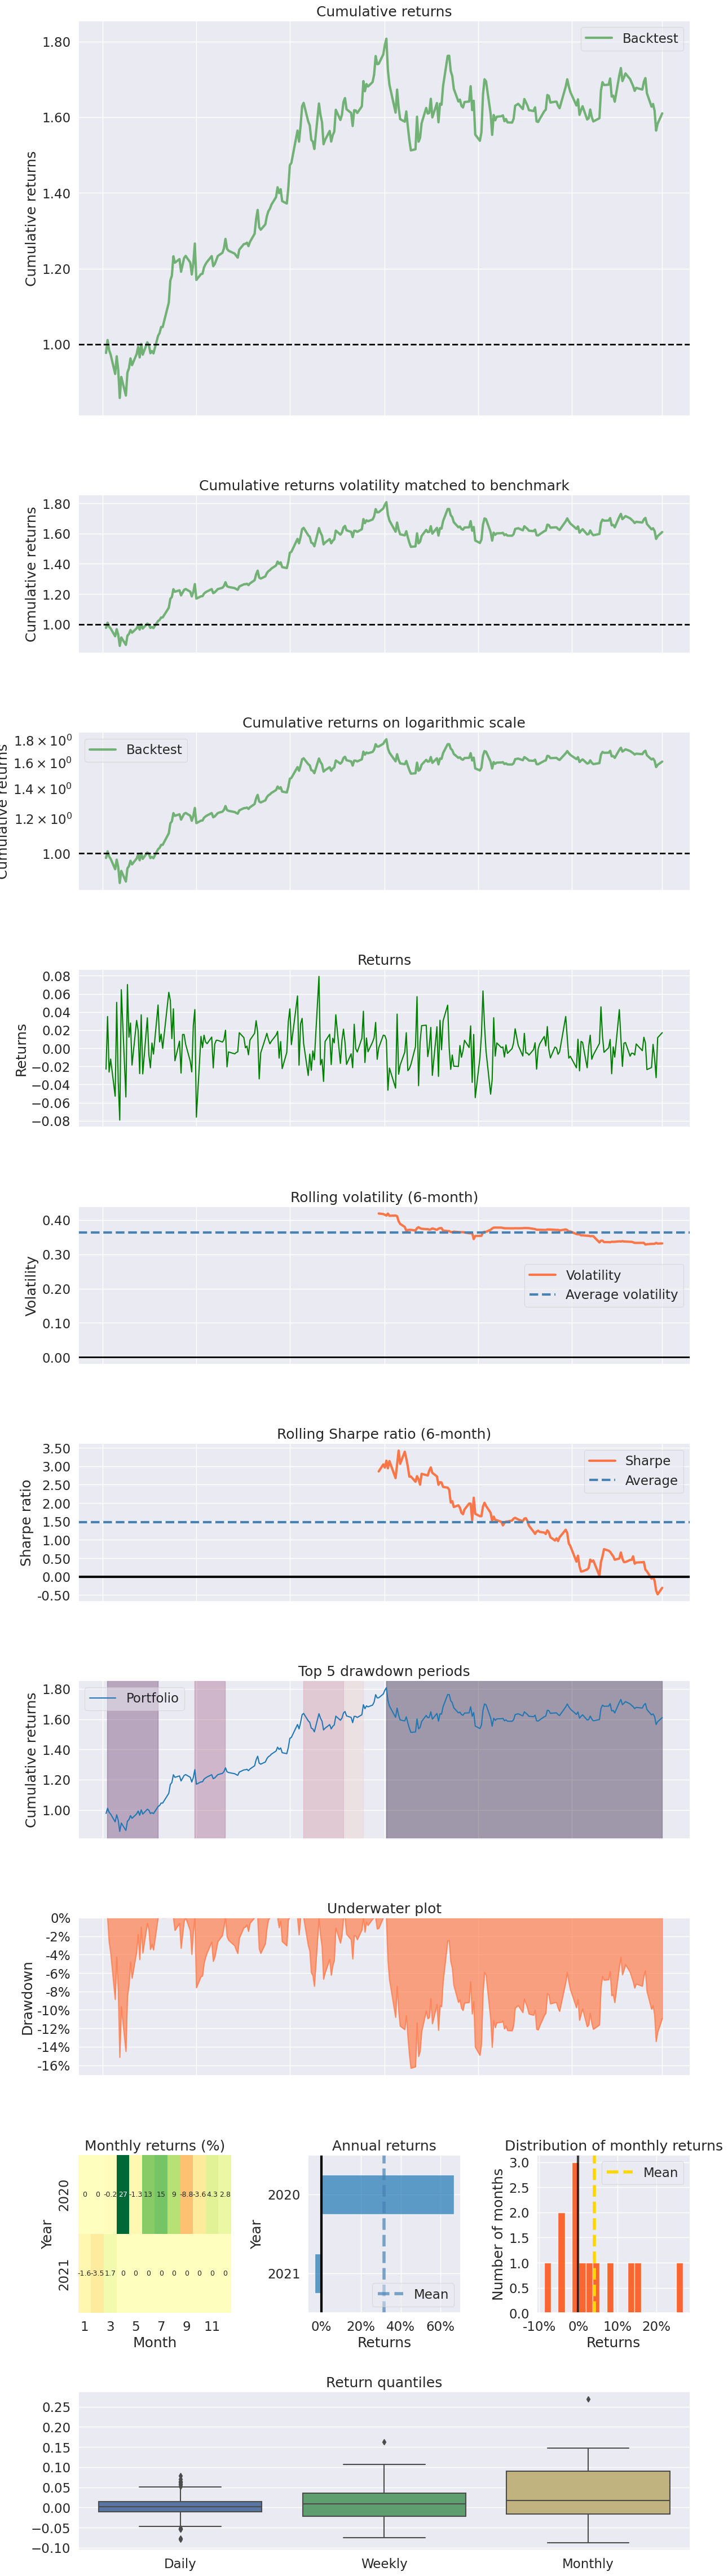

In [74]:
# Calculate betas of AMZN, RTH, AMT, IYR, XOM, XLE 
result = pf.create_returns_tear_sheet(AMZN_daily_returns_df.reset_index(level = 1,drop = True).daily_returns,
                                           return_fig=True)
result.savefig("amzn_pan_tearsheet.png", format = "png")


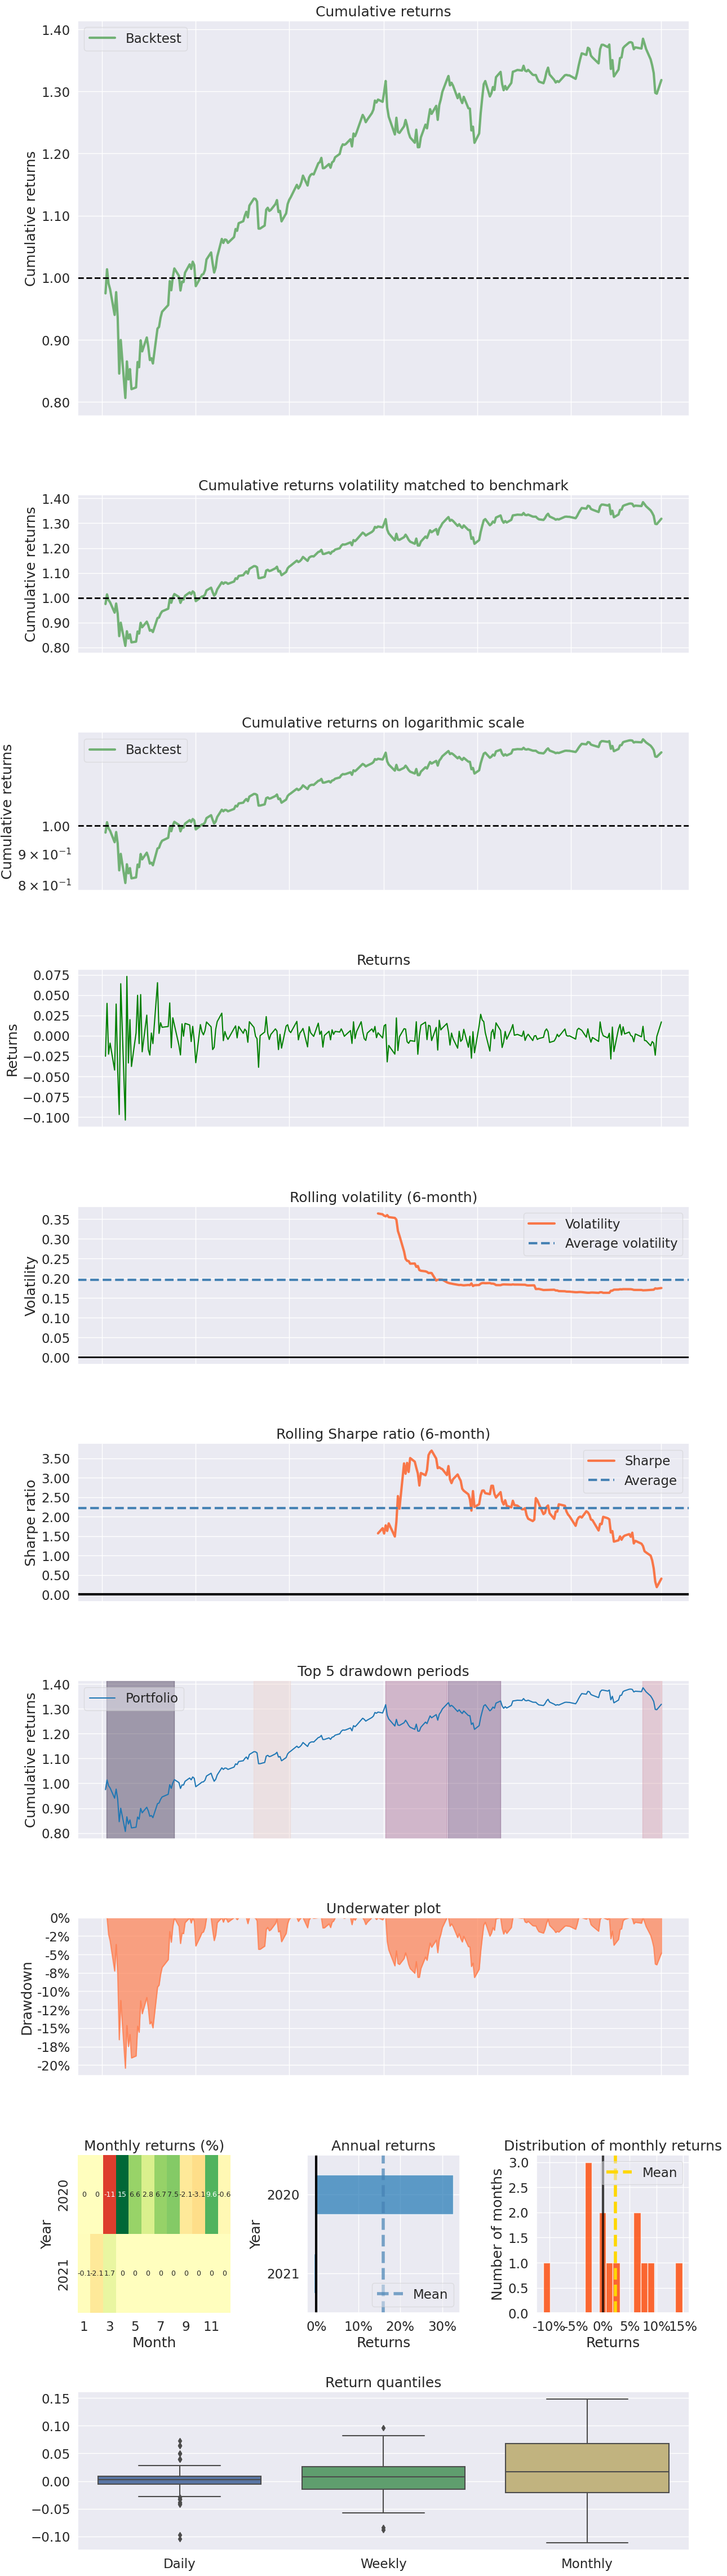

In [75]:
result = pf.create_returns_tear_sheet(RTH_daily_returns_df.reset_index(level = 1,drop = True).daily_returns,
                                           return_fig=True)
result.savefig("rth_pan_tearsheet.png", format = "png")


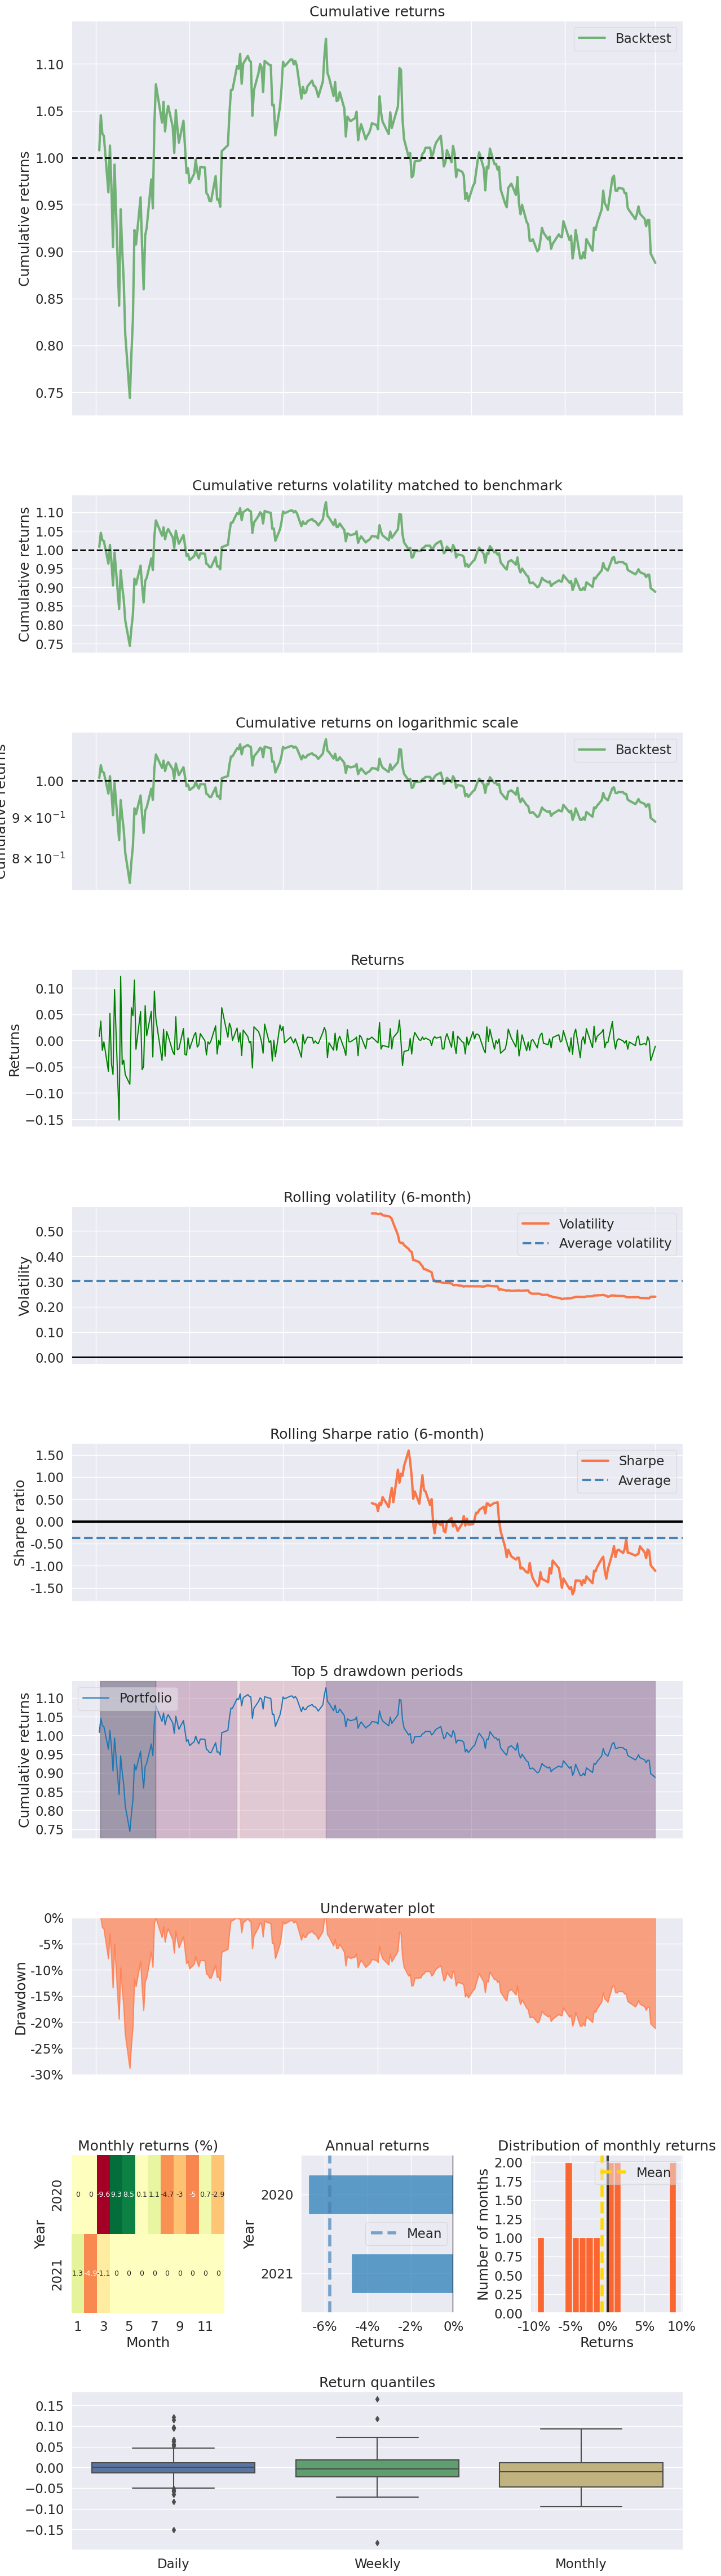

In [76]:
result = pf.create_returns_tear_sheet(AMT_daily_returns_df.reset_index(level = 1,drop = True).daily_returns,
                                           return_fig=True)
result.savefig("amt_pan_tearsheet.png", format = "png")


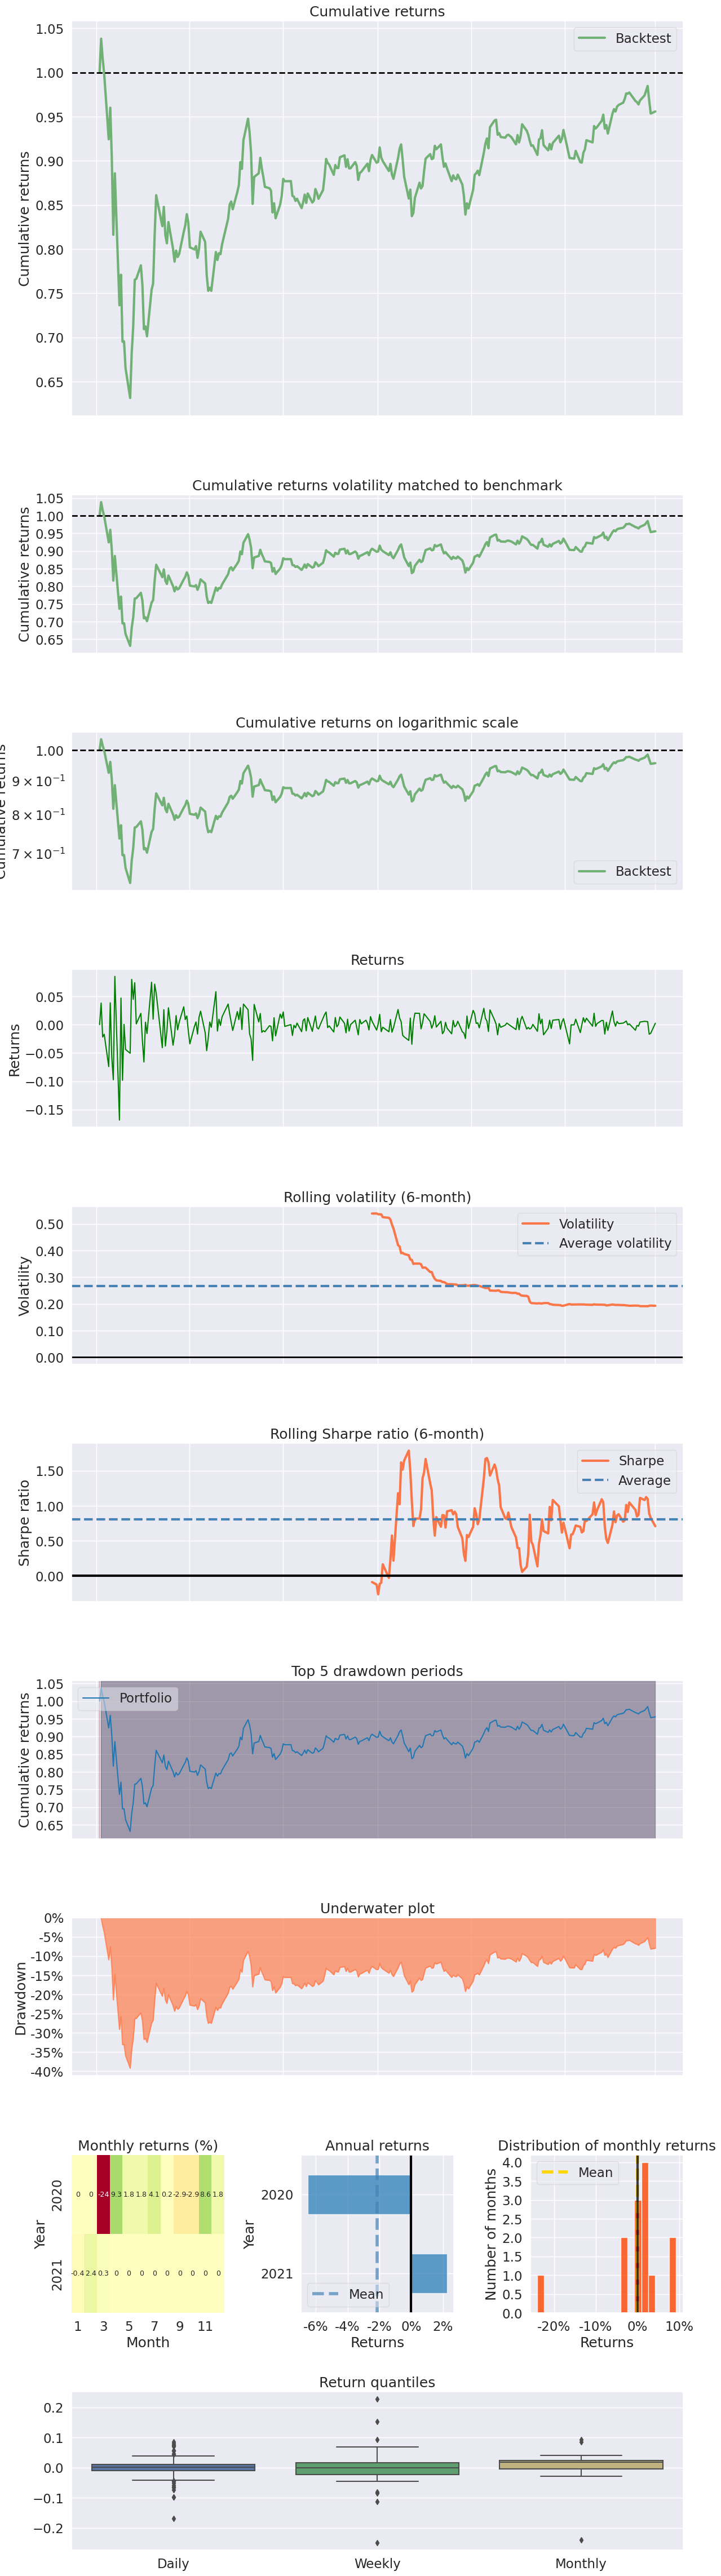

In [77]:
result = pf.create_returns_tear_sheet(IYR_daily_returns_df.reset_index(level = 1,drop = True).daily_returns,
                                           return_fig=True)
result.savefig("iyr_pan_tearsheet.png", format = "png")


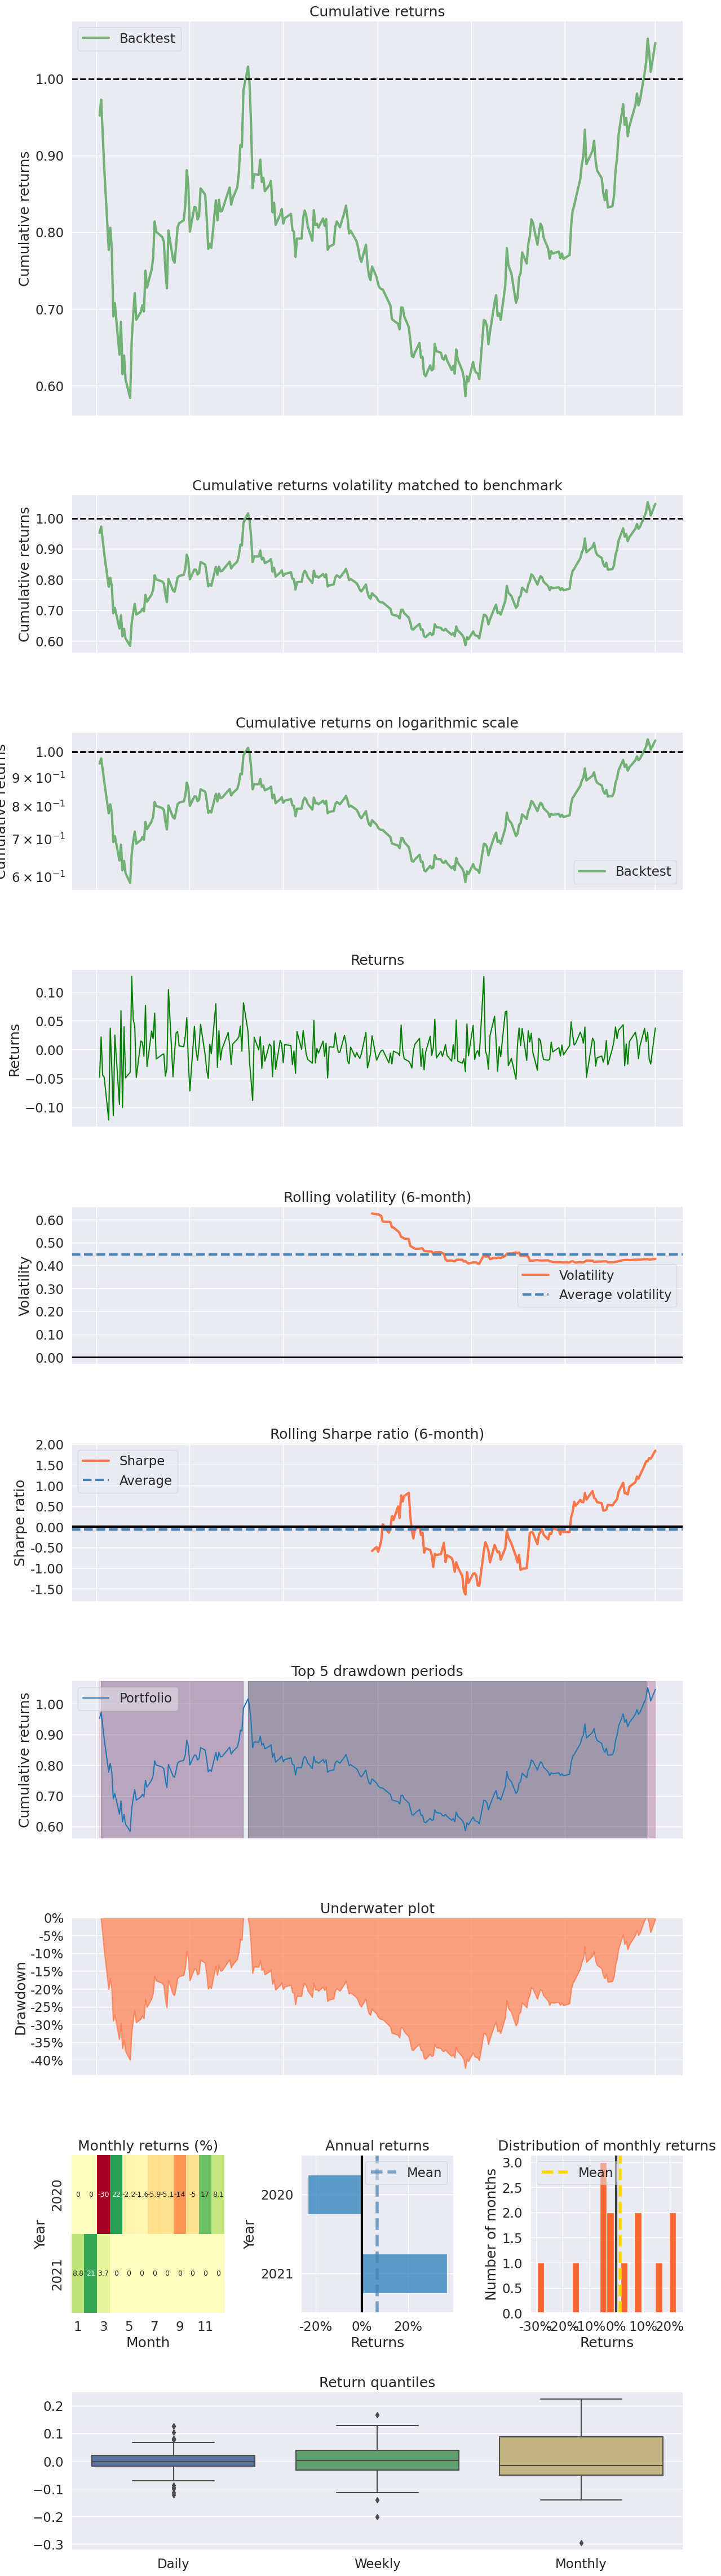

In [78]:
result = pf.create_returns_tear_sheet(XOM_daily_returns_df.reset_index(level = 1,drop = True).daily_returns,
                                           return_fig=True)
result.savefig("xom_pan_tearsheet.png", format = "png")


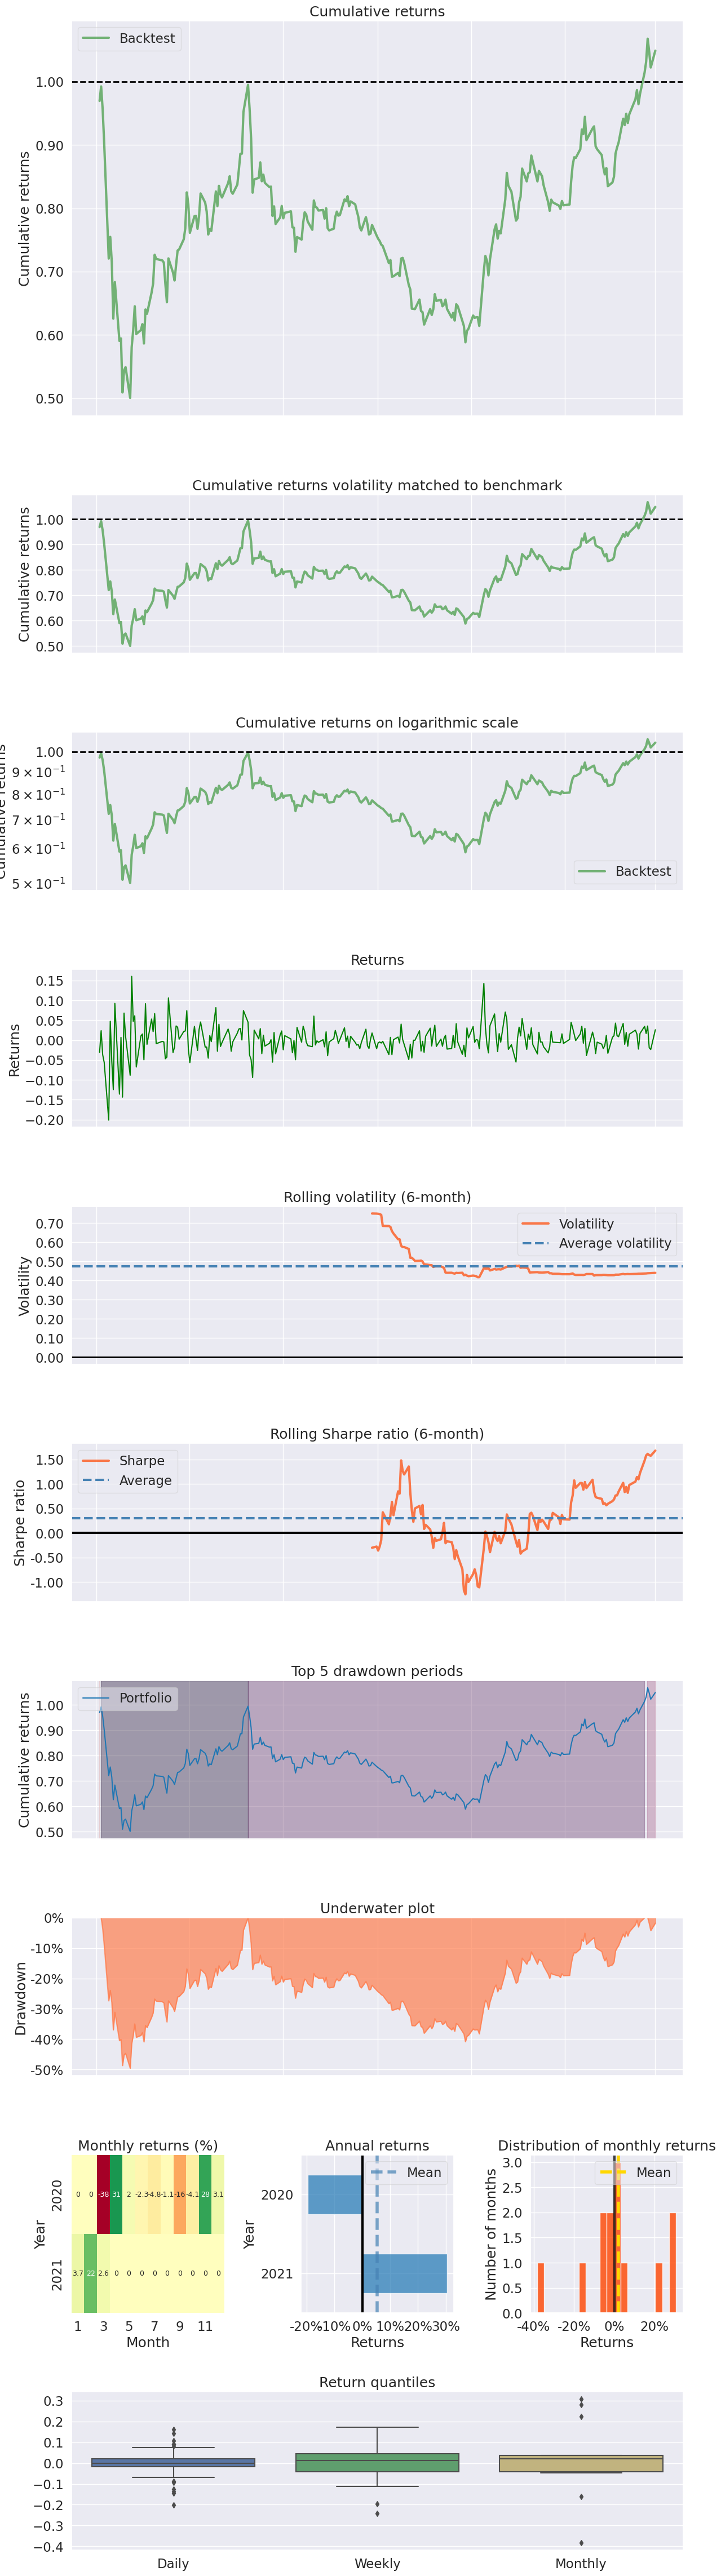

In [79]:
result = pf.create_returns_tear_sheet(XLE_daily_returns_df.reset_index(level = 1,drop = True).daily_returns,
                                           return_fig=True)
result.savefig("xle_pan_tearsheet.png", format = "png")


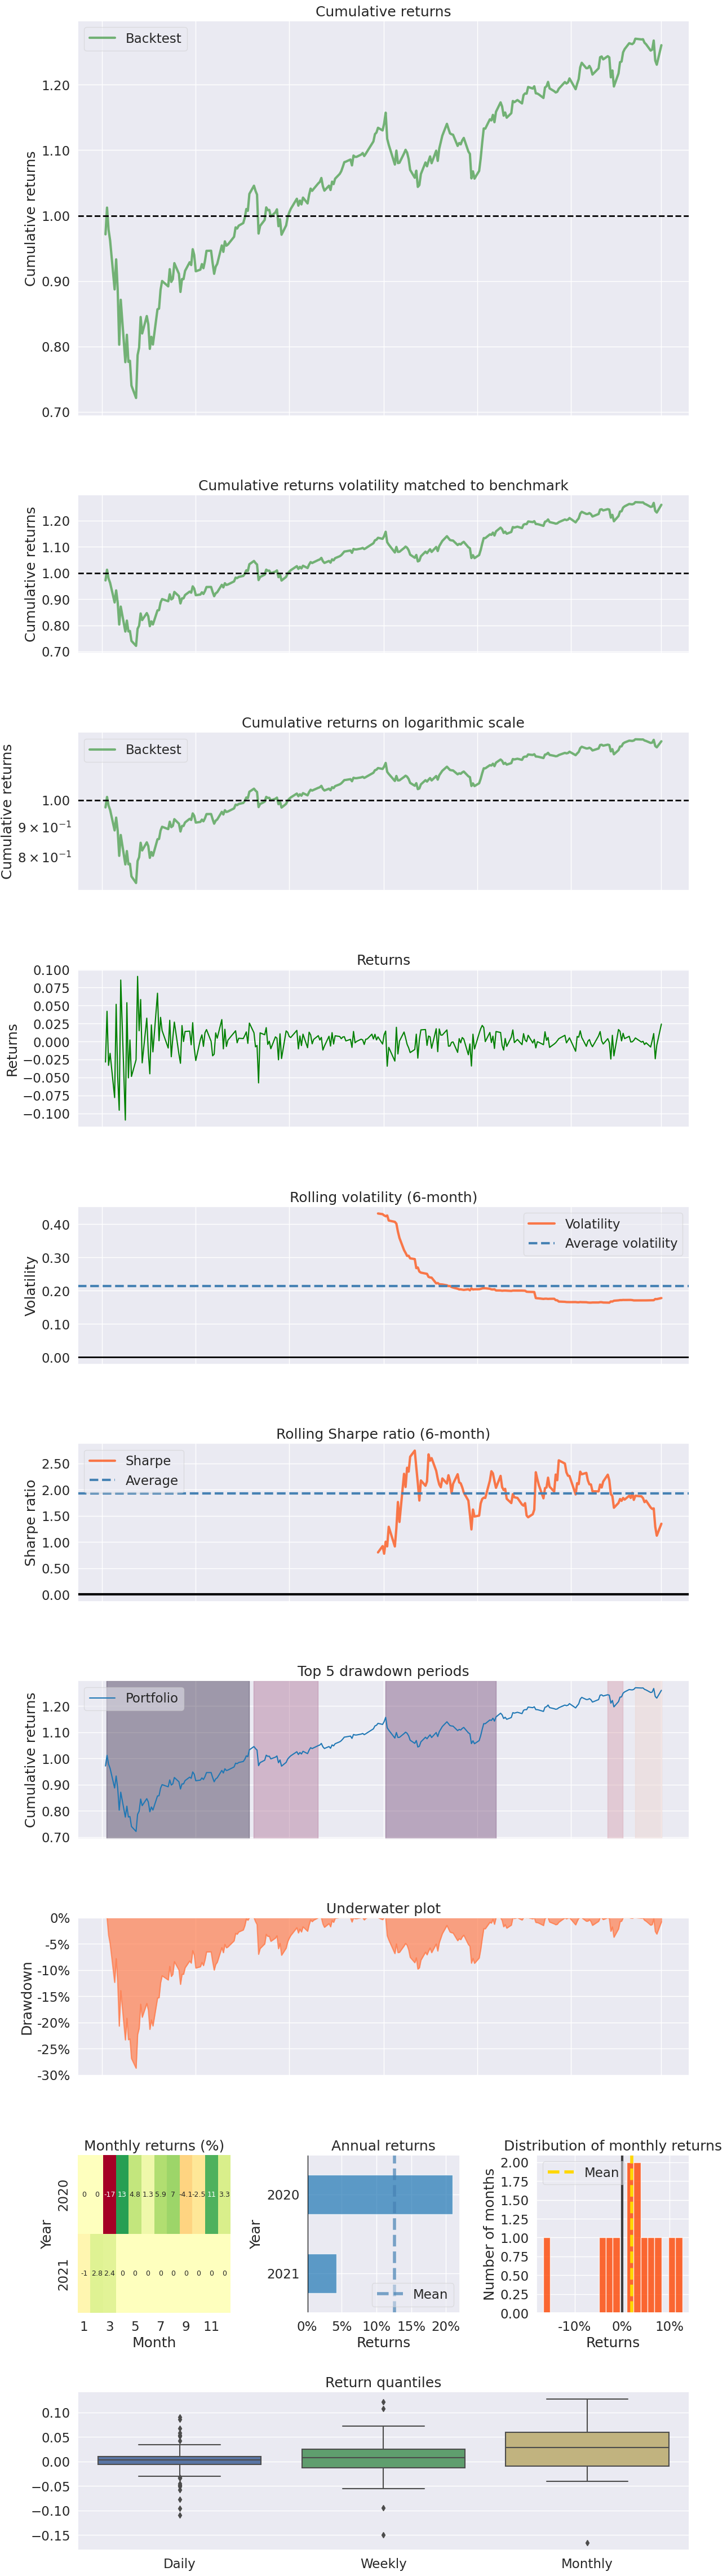

In [80]:
result = pf.create_returns_tear_sheet(SPY_daily_returns_df.reset_index(level = 1,drop = True).daily_returns,
                                           return_fig=True)
result.savefig("spy_pan_tearsheet.png", format = "png")


In [82]:
# Calculate alphas of AMZN, RTH, AMT, IYR, XOM, XLE 



### Analyzing What Would Happen To A Portfolio in Each Sector For the Period Before the Pandemic

In [ ]:
#Questionary SQL
#How much weight do you want in each stock?



In [ ]:
#Portfolio Returns for Tech: use (portfolio_return = weightAMZN * meanAMZN + weightRTH * meanRTH)


In [ ]:
#Portfolio Returns for Real Estate: use (portfolio_return = weightAMT * meanAMT + weightIYR * meanIYR)


In [ ]:
#Portfolio Returns for Energy: use (portfolio_return = weightXOM * meanXOM + weightXLE * meanXLE)



In [ ]:
# Using the Pandas var function, calculate the covariance of the S&P 500 using tech portfolio returns information
# The ETF SPY will represent the market


In [ ]:
# Using the Pandas var function, calculate the covariance of the S&P 500 using Energy portfolio returns information
# The ETF SPY will represent the market



In [ ]:
# Using the Pandas rolling function in conjunction with the var function, 
# calculate the 30-day rolling variance for the S&P 500 using tech daily returns information

# Visualize the 30-day rolling variance of the S&P 500
# Be sure to adjust the figure size and add a title

In [ ]:
#Monte Carlo Simulation


In [ ]:
#Box and Whisker Plot


In [ ]:
#HVPlot


In [ ]:
#bar plot comparing returns of all sectors 


In [ ]:
#bar plot comparing returns of all portfolio